In [1]:
import numpy
from astropy.io import fits

import sed

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def alphas(redshift, alpha_0, alpha_1, z1 = 1):
    """ For a given set of alpha_0, alpha_1 values, return the alpha values for the
    Dirichlet distribution at the given redshift z, evolving from z=0 to z=z1 (z1 = 1 by default)"""
    
    if len(alpha_0) != len(alpha_1):
        raise RuntimeError('alpha_0 and alpha_1 must have equal lengths')

    #shape = (redshift, alpha)
    dirichlet_alphas = np.array([np.power(a0, 1-(redshift/z1)) * np.power(a1, (redshift/z1)) for a0,a1 in zip(alpha_0, alpha_1)]).T
    return dirichlet_alphas

In [3]:
def f_lambda(alphas, template_file, ext = 1):
    """ For a given set of alphas, return the c_i weighted SED for each galaxy from a set
    of templates in template_file, in extension ext"""
    alphas = alphas.reshape(-1,alphas.shape[-1])
    nz , nt = alphas.shape
    ci = np.zeros_like(alphas)
    for i in range(nz):
        ci[i] = np.random.dirichlet(alphas[i])
    #This assumes SED are on an image file with dimensions (n_lambda, n_template)
    templates = np.array(fits.open(template_file)[ext].data)
    sed = np.matmul(ci,templates)
    print(sed.shape)
    return sed

In [4]:
a0 = np.random.rand(5)
a1 = np.random.rand(5)
redshifts = np.random.rand(100)
# redshifts = 3

In [5]:
a = alphas(redshifts, a0, a1)

In [6]:
f = f_lambda(a, 'k_nmf_derived.default.fits', ext=1)

(100, 10000)


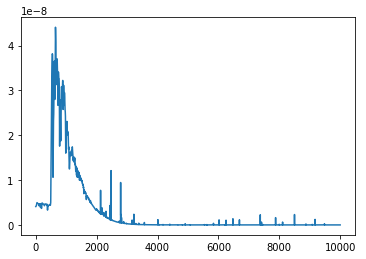

In [7]:
plt.plot(f[0])

In [8]:
aa = sed.alphas(redshifts, a0, a1)
ff = sed.f_lambda(a, 'k_nmf_derived.default.fits', ext=1)

(100, 10000)


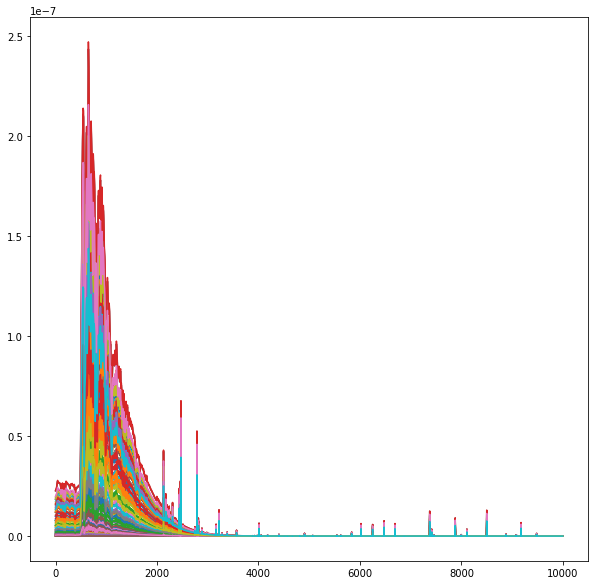

In [14]:
plt.figure(figsize=(10,10))
for i in range(len(redshifts)):
    plt.plot(f[i])
plt.show()

In [ ]:
plt.show()